### Loading the package

In [1]:
%run artifactpackage.ipynb
%run Confusionmatrix.ipynb
%run masrur_ploting_utils.ipynb

2023-11-06 10:48:28.120764: I tensorflow/core/util/port.cc:110] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-11-06 10:48:28.124678: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 10:48:28.204609: I tensorflow/tsl/cuda/cudart_stub.cc:28] Could not find cuda drivers on your machine, GPU will not be used.
2023-11-06 10:48:28.206231: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F AVX512_VNNI FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-11-06 10:48:29.735610: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Co

### Loading The Datasets

In [12]:
#Training dataset
dc = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/CIC-Malmem/balanced_traindata_randomsample.csv')
#dc['Class'] = dc['Class'].replace({'Benign': 0, 'Malware': 1})
dc

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,39,12,12.662889,0,291.115783,1938,49.708500,11353,291.839501,0,...,222,26,27,118,0,123,88,0,8,0
1,44,13,12.448646,0,275.954252,2187,48.631396,12412,275.954252,0,...,222,26,27,118,0,124,88,0,8,0
2,47,17,11.399939,0,255.023716,2104,44.774123,12184,259.252623,0,...,222,26,24,118,0,126,87,0,8,0
3,42,12,13.404762,0,294.736143,2085,49.642857,12378,294.736143,0,...,222,26,27,118,0,126,88,0,8,0
4,42,12,11.951040,0,263.369888,1934,46.053991,11064,282.421473,0,...,222,26,27,118,0,123,88,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,40,12,13.452532,0,305.287922,2082,52.050000,12211,305.287922,0,...,222,26,27,118,0,123,88,0,8,0
58592,39,12,13.452337,0,302.885261,1992,51.086125,11812,302.885261,0,...,222,26,27,118,0,123,88,0,8,0
58593,42,12,13.428571,0,303.969798,2193,52.215884,12766,303.969798,0,...,222,26,27,118,0,123,88,0,8,0
58594,50,22,11.155679,0,273.836235,2448,48.960000,13691,273.836235,0,...,222,26,25,118,0,127,87,0,8,0


In [13]:
#Test Dataset
dr = pd.read_csv('/media/masharifin/D Drive/ComprehensiveExam/Datasets/CIC-Malmem/balanced_testdata_randomsample.csv')
#dr['Class'] = dr['Class'].replace({'Benign': 0, 'Malware': 1})
dc

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric,Class
0,39,12,12.662889,0,291.115783,1938,49.708500,11353,291.839501,0,...,222,26,27,118,0,123,88,0,8,0
1,44,13,12.448646,0,275.954252,2187,48.631396,12412,275.954252,0,...,222,26,27,118,0,124,88,0,8,0
2,47,17,11.399939,0,255.023716,2104,44.774123,12184,259.252623,0,...,222,26,24,118,0,126,87,0,8,0
3,42,12,13.404762,0,294.736143,2085,49.642857,12378,294.736143,0,...,222,26,27,118,0,126,88,0,8,0
4,42,12,11.951040,0,263.369888,1934,46.053991,11064,282.421473,0,...,222,26,27,118,0,123,88,0,8,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,40,12,13.452532,0,305.287922,2082,52.050000,12211,305.287922,0,...,222,26,27,118,0,123,88,0,8,0
58592,39,12,13.452337,0,302.885261,1992,51.086125,11812,302.885261,0,...,222,26,27,118,0,123,88,0,8,0
58593,42,12,13.428571,0,303.969798,2193,52.215884,12766,303.969798,0,...,222,26,27,118,0,123,88,0,8,0
58594,50,22,11.155679,0,273.836235,2448,48.960000,13691,273.836235,0,...,222,26,25,118,0,127,87,0,8,0


In [14]:
features = dc.drop('Class', axis=1).values
Class = dc['Class'].values
X_train=dc.drop(columns='Class')
y_train=dc['Class']

In [15]:
X_train

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
0,39,12,12.662889,0,291.115783,1938,49.708500,11353,291.839501,0,...,395,222,26,27,118,0,123,88,0,8
1,44,13,12.448646,0,275.954252,2187,48.631396,12412,275.954252,0,...,395,222,26,27,118,0,124,88,0,8
2,47,17,11.399939,0,255.023716,2104,44.774123,12184,259.252623,0,...,392,222,26,24,118,0,126,87,0,8
3,42,12,13.404762,0,294.736143,2085,49.642857,12378,294.736143,0,...,395,222,26,27,118,0,126,88,0,8
4,42,12,11.951040,0,263.369888,1934,46.053991,11064,282.421473,0,...,395,222,26,27,118,0,123,88,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,40,12,13.452532,0,305.287922,2082,52.050000,12211,305.287922,0,...,395,222,26,27,118,0,123,88,0,8
58592,39,12,13.452337,0,302.885261,1992,51.086125,11812,302.885261,0,...,395,222,26,27,118,0,123,88,0,8
58593,42,12,13.428571,0,303.969798,2193,52.215884,12766,303.969798,0,...,395,222,26,27,118,0,123,88,0,8
58594,50,22,11.155679,0,273.836235,2448,48.960000,13691,273.836235,0,...,393,222,26,25,118,0,127,87,0,8


In [16]:
y_train

0        0
1        0
2        0
3        0
4        0
        ..
58591    0
58592    0
58593    0
58594    0
58595    0
Name: Class, Length: 58596, dtype: int64

In [17]:
features = dr.drop('Class', axis=1).values
Class = dr['Class'].values
X_test=dr.drop(columns='Class')
y_test=dr['Class']

In [18]:
X_test

,pslist.nproc,pslist.nppid,pslist.avg_threads,pslist.nprocs64bit,pslist.avg_handlers,dlllist.ndlls,dlllist.avg_dlls_per_proc,handles.nhandles,handles.avg_handles_per_proc,handles.nport,...,svcscan.nservices,svcscan.kernel_drivers,svcscan.fs_drivers,svcscan.process_services,svcscan.shared_process_services,svcscan.interactive_process_services,svcscan.nactive,callbacks.ncallbacks,callbacks.nanonymous,callbacks.ngeneric
0,40,12,1.380512e+01,0,310.075595,2092,52.300000,12403,310.075595,0,...,395,222,26,27,118,0,123,88,0,8
1,40,12,1.375000e+01,0,304.275000,2064,51.600000,12171,304.275000,0,...,395,222,26,27,118,0,124,88,0,8
2,44,13,1.257603e+01,0,279.283605,2170,48.909541,12395,279.283605,0,...,395,222,26,27,118,0,124,88,0,8
3,42,12,1.305386e+01,0,292.704269,2082,49.592771,12293,292.704269,0,...,395,222,26,27,118,0,124,88,0,8
4,44,18,1.231995e+01,0,249.157298,1948,43.492821,11161,254.260744,0,...,392,222,26,24,118,0,122,87,0,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58591,75,24,3.247951e+07,0,-0.066667,3431,48.323944,28361,423.298508,0,...,0,0,0,0,0,0,0,45,1,17
58592,65,19,1.683077e+01,0,-0.076923,3144,49.125000,21406,369.068965,0,...,0,0,0,0,0,0,0,44,0,17
58593,62,21,1.722581e+01,0,-0.064516,2915,50.258621,3289,60.907407,0,...,0,0,0,0,0,0,0,46,1,18
58594,69,23,1.908696e+01,0,-0.043478,3635,52.681159,25863,397.892308,0,...,0,0,0,0,0,0,0,48,0,21


In [19]:
y_test

0        0
1        0
2        0
3        0
4        0
        ..
58591    1
58592    1
58593    1
58594    1
58595    1
Name: Class, Length: 58596, dtype: int64

## Machine Learning Model Build

### Random_Model_1: Decision Tree

In [20]:
Dt_classifier= DecisionTreeClassifier(random_state=29)
Dt_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_dt = Dt_classifier.predict(X_train)
y_pred_test_dt = Dt_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_dt = accuracy_score(y_train, y_pred_train_dt)
accuracy_test_dt = accuracy_score(y_test, y_pred_test_dt)

print(f"Training Accuracy: {accuracy_train_dt}")
print(f"Test Accuracy: {accuracy_test_dt}")

Training Accuracy: 1.0
Test Accuracy: 0.9999146699433409


In [21]:
filename_dt= 'Binary_security_dt_rm.sav'
pickle.dump(Dt_classifier, open(filename_dt, 'wb'))
load_model_dt=pickle.load(open('Binary_security_dt_rm.sav','rb'))
load_pred_dt=load_model_dt.predict(X_test)

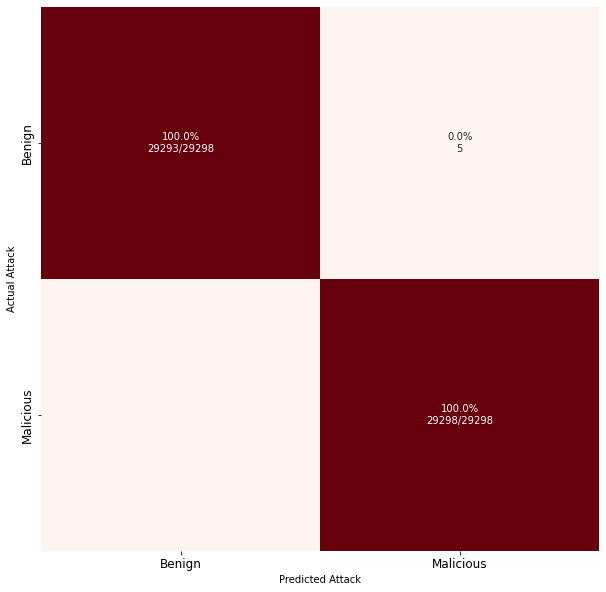

In [22]:
plot_cm(y_test, load_pred_dt)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
44                       svcscan.nservices    0.986394
47                svcscan.process_services    0.006048
8             handles.avg_handles_per_proc    0.003555
7                         handles.nhandles    0.000893
51                    callbacks.ncallbacks    0.000754
27                    malfind.commitCharge    0.000682
39    psxview.not_in_pspcid_list_false_avg    0.000525
10                           handles.nfile    0.000282
48         svcscan.shared_process_services    0.000209
11                          handles.nevent    0.000205
12                        handles.ndesktop    0.000203
20                  ldrmodules.not_in_load    0.000118
40  psxview.not_in_csrss_handles_false_avg    0.000064
23              ldrmodules.not_in_load_avg    0.000059
19                         handles.nmutant    0.000010
33            psxview.not_in_csrss_handles    0.000000
34                  psxview.not_in_session    0.000000
35        

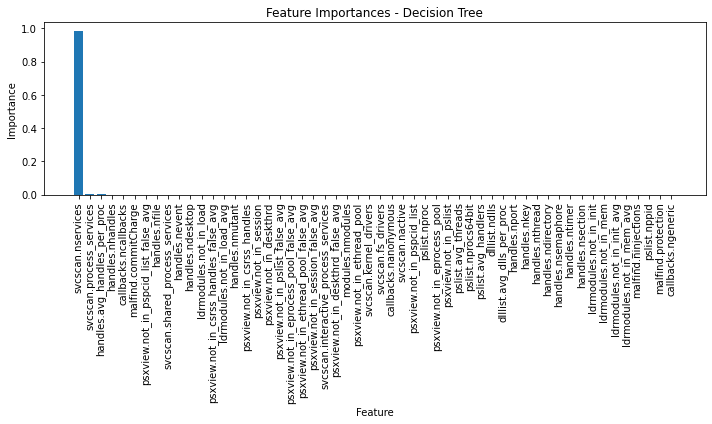

In [23]:
# Get the feature importance scores from the trained Decision Tree model
feature_importance = Dt_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Decision Tree')
plt.tight_layout()
plt.show()

In [24]:
# Initialize model
Dt_classifier = DecisionTreeClassifier(random_state=29)

# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(Dt_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Random_Model_2: Random forest

In [25]:
rf_classifier=RandomForestClassifier(n_estimators=100)
rf_classifier.fit(X_train, y_train)
y_pred_rf=rf_classifier.predict(X_test)
# Predict on training and test sets
y_pred_train_rf = rf_classifier.predict(X_train)
y_pred_test_rf = rf_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_rf = accuracy_score(y_train, y_pred_train_rf)
accuracy_test_rf = accuracy_score(y_test, y_pred_test_rf)

print(f"Training Accuracy: {accuracy_train_rf}")
print(f"Test Accuracy: {accuracy_test_rf}")

Training Accuracy: 1.0
Test Accuracy: 1.0


In [26]:
filename_rf= 'Binary_security_rf_rm.sav'
pickle.dump(rf_classifier, open(filename_rf, 'wb'))
load_model_dt=pickle.load(open('Binary_security_rf_rm.sav','rb'))
load_pred_rf=load_model_dt.predict(X_test)

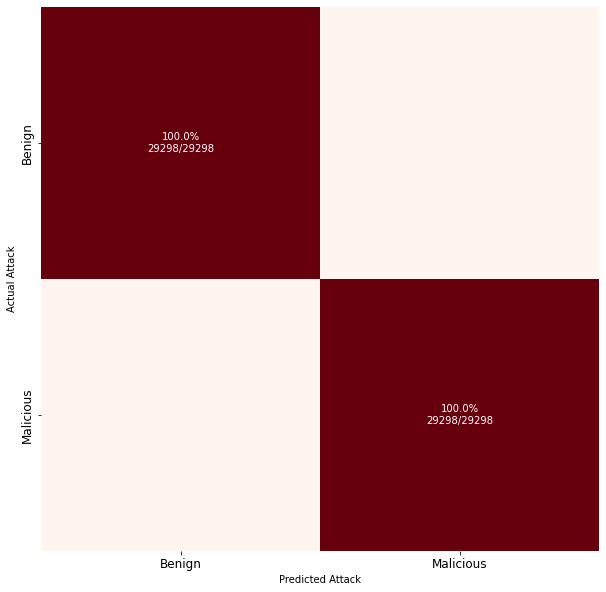

In [27]:
plot_cm(y_test, load_pred_rf)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
45                  svcscan.kernel_drivers    0.171598
44                       svcscan.nservices    0.124388
8             handles.avg_handles_per_proc    0.097776
4                      pslist.avg_handlers    0.087138
11                          handles.nevent    0.086530
48         svcscan.shared_process_services    0.084343
19                         handles.nmutant    0.050684
18                        handles.nsection    0.049922
6                dlllist.avg_dlls_per_proc    0.049311
5                            dlllist.ndlls    0.036834
13                            handles.nkey    0.028209
14                         handles.nthread    0.020180
16                      handles.nsemaphore    0.019166
7                         handles.nhandles    0.019088
25               ldrmodules.not_in_mem_avg    0.014528
17                          handles.ntimer    0.009421
20                  ldrmodules.not_in_load    0.008894
22        

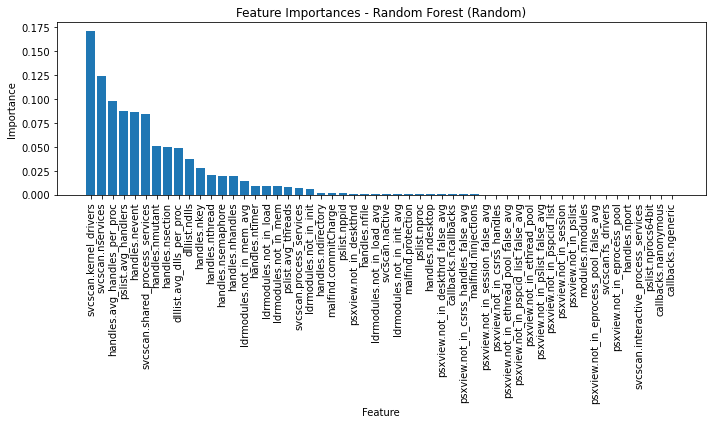

In [28]:
# Get the feature importance scores from the trained Random Forest model
feature_importance = rf_classifier.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X_test.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_df)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - Random Forest (Random)')
plt.tight_layout()
plt.show()

In [29]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(rf_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Random_Model_3: LGBM

In [30]:
lgb_nor=lgb.LGBMClassifier(n_jobs= -1)
lgb_nor.fit(X_train,y_train)
y_pred_lgbm =lgb_nor.predict(X_test)
print(y_pred_lgbm)
cohen_kappa_score(y_test,y_pred_lgbm)

[0 0 0 ... 1 1 1]


1.0

In [31]:
# Predict on training and test sets
y_pred_train_lgb = lgb_nor.predict(X_train)
y_pred_test_lgb = lgb_nor.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_lgb = accuracy_score(y_train, y_pred_train_lgb)
accuracy_test_lgb = accuracy_score(y_test, y_pred_test_lgb)

print(f"Training Accuracy: {accuracy_train_lgb}")
print(f"Test Accuracy: {accuracy_test_lgb}")

Training Accuracy: 1.0
Test Accuracy: 1.0


In [32]:
print("",classification_report(y_test,y_pred_lgbm))

               precision    recall  f1-score   support

           0       1.00      1.00      1.00     29298
           1       1.00      1.00      1.00     29298

    accuracy                           1.00     58596
   macro avg       1.00      1.00      1.00     58596
weighted avg       1.00      1.00      1.00     58596



In [33]:
accuracy = lgb_nor.score(X_test, y_test)
print("Accuracy:", accuracy)

Accuracy: 1.0


In [34]:
filename_lgbm= 'Binary_security_lgbm_rm.sav'
pickle.dump(lgb_nor, open(filename_lgbm, 'wb'))
load_model_lgbm=pickle.load(open('Binary_security_lgbm_rm.sav','rb'))
load_pred_lgbm=load_model_lgbm.predict(X_test)

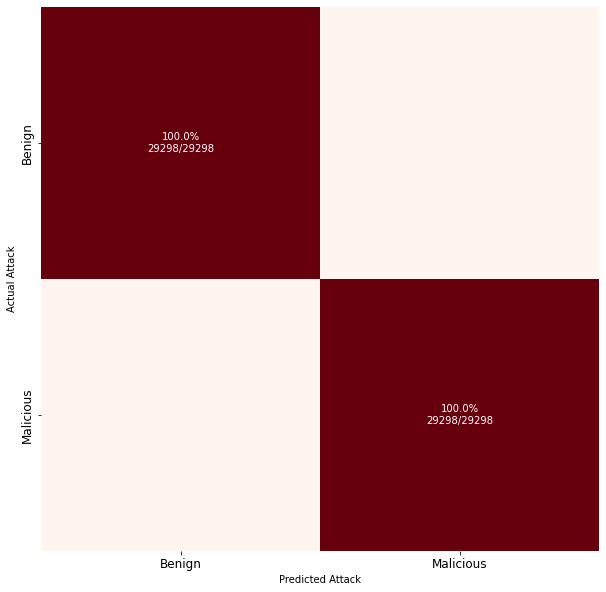

In [35]:
plot_cm(y_test, load_pred_lgbm)
plt.savefig('cm.eps',dpi=600)

                                   Feature  Importance
45                  svcscan.kernel_drivers    0.171598
44                       svcscan.nservices    0.124388
8             handles.avg_handles_per_proc    0.097776
4                      pslist.avg_handlers    0.087138
11                          handles.nevent    0.086530
48         svcscan.shared_process_services    0.084343
19                         handles.nmutant    0.050684
18                        handles.nsection    0.049922
6                dlllist.avg_dlls_per_proc    0.049311
5                            dlllist.ndlls    0.036834
13                            handles.nkey    0.028209
14                         handles.nthread    0.020180
16                      handles.nsemaphore    0.019166
7                         handles.nhandles    0.019088
25               ldrmodules.not_in_mem_avg    0.014528
17                          handles.ntimer    0.009421
20                  ldrmodules.not_in_load    0.008894
22        

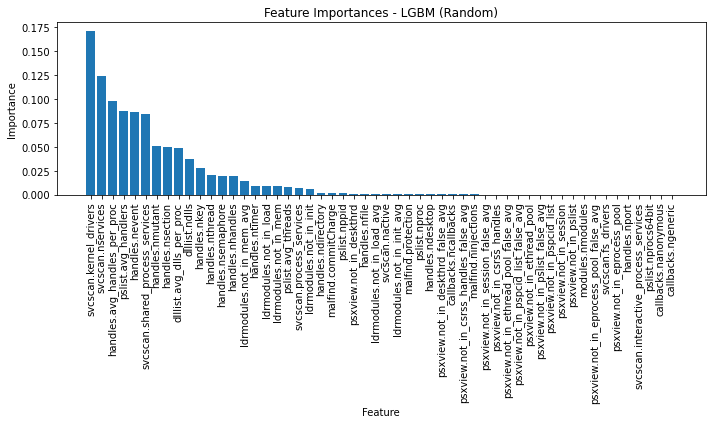

In [36]:
# Get the feature importance scores from the trained LGBM model
feature_importance = lgb_nor.feature_importances_

# Create a DataFrame to store the feature names and their importance scores
feature_importance_lgb = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})

# Sort the DataFrame by importance in descending order
feature_importance_lgb = feature_importance_df.sort_values(by='Importance', ascending=False)

# Print the ranked list of features with their importance scores
print(feature_importance_lgb)

# Plot the feature importances
plt.figure(figsize=(10, 6))
plt.bar(feature_importance_df['Feature'], feature_importance_df['Importance'])
plt.xticks(rotation=90)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances - LGBM (Random)')
plt.tight_layout()
plt.show()

In [37]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(lgb_nor, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


### Random Model_5: GaussianNB

In [38]:
# Create a Gaussian Naive Bayes classifier
nb_classifier = GaussianNB()

# Train the classifier
nb_classifier.fit(X_train, y_train)

# Predict on training and test sets
y_pred_train_nb = nb_classifier.predict(X_train)
y_pred_test_nb = nb_classifier.predict(X_test)

# Calculate accuracy on training and test sets
accuracy_train_nb = accuracy_score(y_train, y_pred_train_nb)
accuracy_test_nb = accuracy_score(y_test, y_pred_test_nb)

print(f"Training Accuracy: {accuracy_train_nb}")
print(f"Test Accuracy: {accuracy_test_nb}")

Training Accuracy: 0.9922178988326849
Test Accuracy: 0.9948119325551232


In [39]:
filename_nb= 'Binary_security_nb_rm.sav'
pickle.dump(nb_classifier, open(filename_nb, 'wb'))
load_model_nb=pickle.load(open('Binary_security_nb_rm.sav','rb'))
load_pred_nb=load_model_nb.predict(X_test)

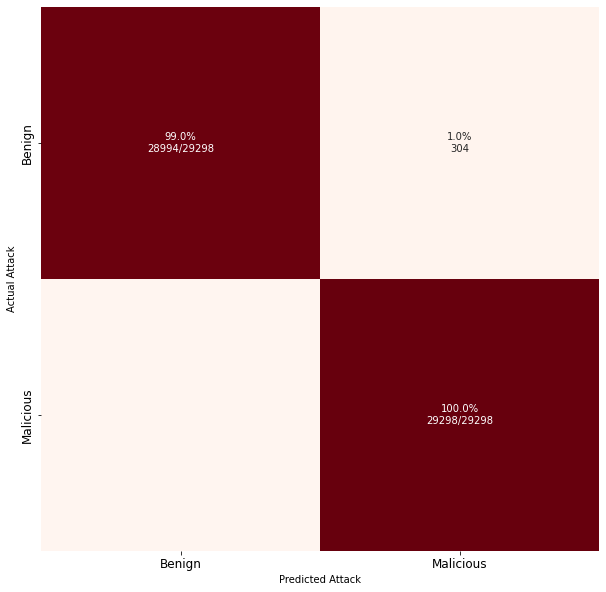

In [40]:
plot_cm(y_test, load_pred_nb)
plt.savefig('cm.eps',dpi=600)

In [41]:
# Define the number of folds for cross-validation
num_folds = 5

# Perform cross-validation
cross_val_scores = cross_val_score(nb_classifier, X_test, y_test, cv=num_folds)

# Print the cross-validation scores
print("Cross-Validation Scores:", cross_val_scores)

# Calculate the mean and standard deviation of the cross-validation scores
mean_score = cross_val_scores.mean()
std_score = cross_val_scores.std()

# Print the mean and standard deviation
print("Mean Score:", mean_score)
print("Standard Deviation:", std_score)

Cross-Validation Scores: [1. 1. 1. 1. 1.]
Mean Score: 1.0
Standard Deviation: 0.0


# ROC 

In [42]:
# Fit the classifiers with training data
Dt_classifier.fit(X_train, y_train)
rf_classifier.fit(X_train, y_train)
lgb_nor.fit(X_train, y_train)

LGBMClassifier()

In [43]:
proba_df = pd.DataFrame({
       
    'DECISIONTREE':Dt_classifier.predict_proba(X_test)[:,1],
    'RANDOMFORREST':rf_classifier.predict_proba(X_test)[:,1],
    'LGBM':lgb_nor.predict_proba(X_test)[:,1],
    'NB':nb_classifier.predict_proba(X_test)[:,1],
    })

In [44]:
proba_df.to_csv('probability.csv')

DECISIONTREE
  AUC: 1.0
RANDOMFORREST
  AUC: 1.0
LGBM
  AUC: 1.0
NB
  AUC: 0.997


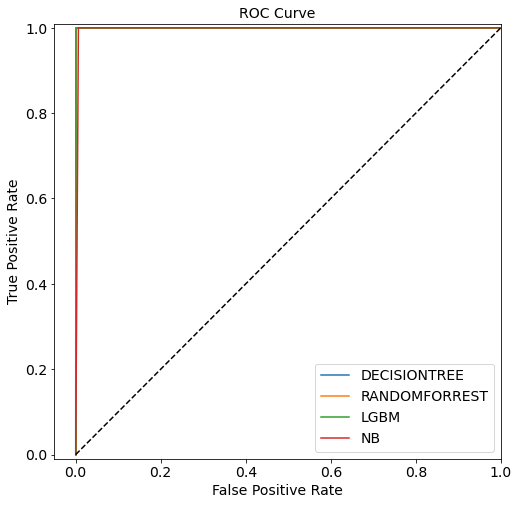

In [45]:
filename_ROC='ROC_curve_Binary_security.png'
plot_roc_curves(proba_df, y_test,filename_ROC)

# Performance Metrics

In [46]:
#estimator and names fuction
def est(clf,names):
    estm=[]
    for i in range(len(clf)):
        n=names[i]
        claf=clf[i]
        estm.append((n,claf))
    return estm
clf=[Dt_classifier,rf_classifier,lgb_nor,nb_classifier]
name=['DecisionTree','RandomForest','LightGBM','NB']
est_1=est(clf,name)

In [47]:
cross_val_scores = {}
accuracy_scores = {}
error_scores = {}
f1_scores = {}
fpr_scores = {}
kappa_scores = {}
mcc_scores = {}
ppv_scores = {}
sensitivity_scores = {}
specificity_scores = {}
auc_scores = {}
y_preds = {}
y_probs = {}
threat_scores = {}
balanced_accuracy_scores = {}


for algorithm, model in est_1:
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)
    y_preds[algorithm] = y_pred
    y_probs[algorithm] = y_prob
    
    cross_val_scores[algorithm] = cross_val_score(model, X_train, y_train, cv=10).mean()
    accuracy_scores[algorithm] = accuracy_score(y_test, y_pred)
    error_scores[algorithm] = 1 - accuracy_scores[algorithm]
    f1_scores[algorithm] = f1_score(y_test, y_pred, average="weighted")
    kappa_scores[algorithm] = cohen_kappa_score(y_test, y_pred)
    mcc_scores[algorithm] = matthews_corrcoef(y_test, y_pred)
    ppv_scores[algorithm] = precision_score(y_test, y_pred, average="weighted")
    sensitivity_scores[algorithm] = recall_score(y_test, y_pred, average="weighted")
    confusion_matrix_= confusion_matrix(y_test, y_pred)
    FP = confusion_matrix_.sum(axis=0) - np.diag(confusion_matrix_)  
    FN = confusion_matrix_.sum(axis=1) - np.diag(confusion_matrix_)
    TP = np.diag(confusion_matrix_)
    TN = confusion_matrix_.sum() - (FP + FN + TP)
    fpr_scores[algorithm] = (FP/(FP+TN)).mean()
    specificity_scores[algorithm] = (TN/(TN+FP)).mean()
    threat_scores[algorithm] = (TP/(TP+FN+FP)).mean()
    balanced_accuracy_scores[algorithm] = ((sensitivity_scores[algorithm] + specificity_scores[algorithm])/2).mean()
    print('done for one')


done for one
done for one
done for one
done for one


In [48]:
performance_metrics = {
    'cross_val_scores': cross_val_scores,
    'accuracy_scores': accuracy_scores,
    'error_scores': error_scores,
    'f1_scores': f1_scores,
    'fpr_scores': fpr_scores,
    'kappa_scores': kappa_scores,
    'mcc_scores': mcc_scores,
    'ppv_scores': ppv_scores,
    'sensitivity_scores': sensitivity_scores,
    'specificity_scores': specificity_scores,
    'threat_scores': threat_scores,
    'balanced_accuracy_scores': balanced_accuracy_scores
}

pd.DataFrame(performance_metrics)

,cross_val_scores,accuracy_scores,error_scores,f1_scores,fpr_scores,kappa_scores,mcc_scores,ppv_scores,sensitivity_scores,specificity_scores,threat_scores,balanced_accuracy_scores
DecisionTree,0.998686,0.999915,0.000085,0.999915,0.000085,0.999829,0.999829,0.999915,0.999915,0.999915,0.999829,0.999915
RandomForest,0.998857,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
LightGBM,0.998805,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
NB,0.991894,0.994812,0.005188,0.994812,0.005188,0.989624,0.989677,0.994865,0.994812,0.994812,0.989677,0.994812


In [49]:
perfo_m=pd.DataFrame(performance_metrics)
perfo_m.to_csv('performance_metrics_rm.csv')

## Deep Learning Model Build 

### Random Model_6:ANN

In [50]:
# Create the ANN model
model_ann = Sequential()

# Add layers to the model
model_ann.add(Dense(units=64, activation='relu', input_shape=(X_train.shape[1],)))
model_ann.add(Dense(units=32, activation='relu'))
model_ann.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_ann.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_ann.fit(X_train, y_train, epochs=10, batch_size=32, validation_split=0.1)


Epoch 1/10
1648/1648 [==============================] - 4s 2ms/step - loss: 5.5195 - accuracy: 0.9492 - val_loss: 0.4964 - val_accuracy: 0.9886
Epoch 2/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.6956 - accuracy: 0.9828 - val_loss: 0.8667 - val_accuracy: 0.9747
Epoch 3/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.4923 - accuracy: 0.9867 - val_loss: 0.7487 - val_accuracy: 0.9688
Epoch 4/10
1648/1648 [==============================] - 4s 2ms/step - loss: 0.5007 - accuracy: 0.9856 - val_loss: 0.3618 - val_accuracy: 0.9944
Epoch 5/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.3345 - accuracy: 0.9890 - val_loss: 0.3828 - val_accuracy: 0.9901
Epoch 6/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.2926 - accuracy: 0.9883 - val_loss: 0.0376 - val_accuracy: 0.9964
Epoch 7/10
1648/1648 [==============================] - 3s 2ms/step - loss: 0.1533 - accuracy: 0.9908 - val_loss: 0.1109 - val_accuracy:

In [51]:
 # Evaluate the model on the test set
loss, accuracy_ann = model_ann.evaluate(X_test, y_test)
print(f'Test accuracy: {accuracy_ann:.5f}')

1832/1832 [==============================] - 3s 2ms/step - loss: 126320.8438 - accuracy: 0.9398
Test accuracy: 0.93984


1832/1832 [==============================] - 3s 1ms/step


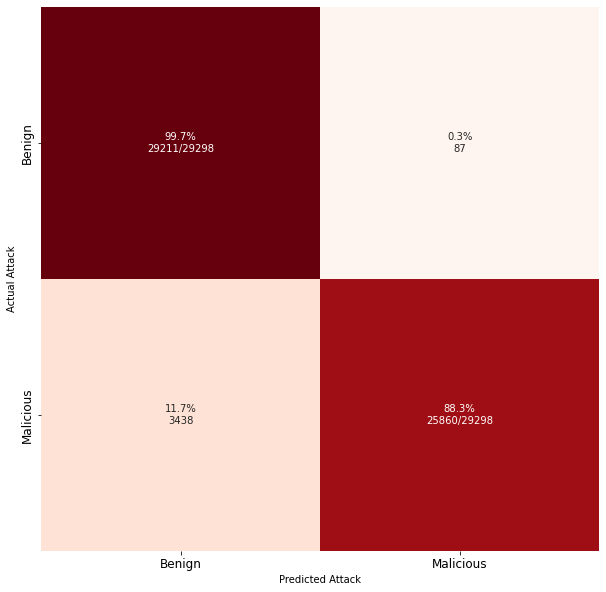

In [52]:
# Save the ANN model to disk
model_ann.save('Binary_security_ann_rm.keras')

# Load the saved ANN model
load_model_ann = load_model('Binary_security_ann_rm.keras')

# Predict using the loaded ANN model
load_pred_ann = load_model_ann.predict(X_test)
load_pred_ann_classes = (load_pred_ann > 0.5).astype(int)  # Convert probabilities to binary classes

plot_cm(y_test, load_pred_ann_classes)
plt.savefig('cm.eps', dpi=600)

### Random Model_7:CNN

In [53]:
# Normalize the input features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Reshape X_train and X_test to be 3D tensors for CNN
X_train_reshaped = X_train_scaled.reshape(X_train_scaled.shape[0], X_train_scaled.shape[1], 1)
X_test_reshaped = X_test_scaled.reshape(X_test_scaled.shape[0], X_test_scaled.shape[1], 1)

# Create the CNN model
model_cnn = Sequential()

# Add convolutional layers
model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(X_train_scaled.shape[1], 1)))
model_cnn.add(MaxPooling1D(pool_size=2))

model_cnn.add(Conv1D(filters=64, kernel_size=3, activation='relu'))
model_cnn.add(MaxPooling1D(pool_size=2))

# Add fully connected layers
model_cnn.add(Flatten())
model_cnn.add(Dense(units=128, activation='relu'))
model_cnn.add(Dense(units=1, activation='sigmoid'))

# Compile the model
model_cnn.compile(optimizer=Adam(learning_rate=0.001), loss='binary_crossentropy', metrics=['accuracy'])

# Train the model
model_cnn.fit(X_train_reshaped, y_train, epochs=10, batch_size=32, validation_split=0.1)

# Evaluate the model on the test set
loss, accuracy_cnn = model_cnn.evaluate(X_test_reshaped, y_test)
print(f'Test accuracy: {accuracy_cnn:.4f}')


Epoch 1/10
1648/1648 [==============================] - 9s 5ms/step - loss: 0.0173 - accuracy: 0.9964 - val_loss: 0.0111 - val_accuracy: 0.9985
Epoch 2/10
1648/1648 [==============================] - 9s 5ms/step - loss: 0.0034 - accuracy: 0.9990 - val_loss: 0.0019 - val_accuracy: 0.9997
Epoch 3/10
1648/1648 [==============================] - 9s 5ms/step - loss: 0.0026 - accuracy: 0.9995 - val_loss: 0.0037 - val_accuracy: 0.9986
Epoch 4/10
1648/1648 [==============================] - 9s 5ms/step - loss: 0.0016 - accuracy: 0.9996 - val_loss: 9.2788e-04 - val_accuracy: 0.9997
Epoch 5/10
1648/1648 [==============================] - 9s 5ms/step - loss: 5.7158e-04 - accuracy: 0.9998 - val_loss: 0.0014 - val_accuracy: 0.9993
Epoch 6/10
1648/1648 [==============================] - 9s 5ms/step - loss: 0.0015 - accuracy: 0.9996 - val_loss: 0.0011 - val_accuracy: 0.9997
Epoch 7/10
1648/1648 [==============================] - 8s 5ms/step - loss: 4.4616e-04 - accuracy: 0.9998 - val_loss: 2.5044e-04

### FGSM Attack On CNN

In [54]:
# Save the model to an keras file
model_cnn.save('malmemcnn-rm.keras')


In [56]:
# FGSM Attack
epsilon = 0.01 # Perturbation magnitude

def fgsm_attack(input_image, epsilon, gradient):
    perturbed_image = input_image + epsilon * tf.sign(gradient)
    perturbed_image = tf.clip_by_value(perturbed_image, 0, 255)
    return perturbed_image


In [57]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]


In [58]:
# Select a random test example for the attack
random_index = np.random.randint(0, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]

# Convert the NumPy array to a TensorFlow tensor
test_example_tensor = tf.convert_to_tensor(test_example)

In [59]:
# Calculate gradients
with tf.GradientTape() as tape:
    tape.watch(test_example_tensor)
    prediction = model_cnn(test_example_tensor)
    # Convert Pandas Series to NumPy array and reshape
    y_test_slice = y_test[random_index : random_index + 1].to_numpy().reshape(prediction.shape)
    loss = tf.keras.losses.binary_crossentropy(y_test_slice, prediction)

gradient = tape.gradient(loss, test_example_tensor)

# Create adversarial example using FGSM
adversarial_example = fgsm_attack(test_example_tensor, epsilon, gradient)

# Convert the adversarial example back to a NumPy array
adversarial_example_np = adversarial_example.numpy()

# Evaluate the model on the adversarial example
adversarial_accuracy = model_cnn.evaluate(adversarial_example_np, y_test_slice)[1]
print(f'Adversarial accuracy: {adversarial_accuracy:.6f}')


1/1 [==============================] - 0s 40ms/step - loss: 3.9969e-13 - accuracy: 1.0000
Adversarial accuracy: 1.000000


The result  is related to the Fast Gradient Sign Method (FGSM), which is used to generate adversarial examples to test the robustness of machine learning models. Let's break down the result:

`1/1 [==============================]`: This part of the output typically indicates the progress of the attack. In this case, it appears to show that one step (iteration) of the attack has been completed.

2. `- 0s 40ms/step`: This part provides timing information, indicating that each step took approximately 40 milliseconds to complete.

3. `loss: 3.9969e-13`: The "loss" value is extremely close to zero, which suggests that the perturbation applied by the FGSM attack is minimal, indicating that the adversarial example is very similar to the original input.

4. `accuracy: 1.0000`: The "accuracy" value is 1.0000, which means that the CNN correctly classifies the adversarial example as the target class with 100% accuracy. In the context of an FGSM attack, this implies that the attack was successful in creating an adversarial example that causes the model to misclassify the input image.

5. `Adversarial accuracy: 1.000000`: This line reiterates the accuracy of the adversarial example, indicating that the model's prediction is consistently the target class, and the attack was successful in producing an adversarial example that fools the CNN.

In summary, the output suggests that the FGSM attack successfully generated an adversarial example that is almost indistinguishable from the original image but causes the CNN to classify it as the target class with 100% accuracy. Adversarial attacks aim to exploit vulnerabilities in machine learning models, and this result indicates that the model is susceptible to this specific attack.


is the attack successfull ?

Yes, based on  the output, the attack can be considered successful. Here's why:

The "accuracy" value is 1.0000, which means that the CNN correctly classifies the adversarial example as the target class with 100% accuracy.

The "Adversarial accuracy" is also 1.000000, which reconfirms that the

In the context of adversarial attacks, success is typically defined as the ability to create an adversarial example that causes the machine learning model to misclassify the input. In this case, the FGSM attack has achieved that by crafting an example that the CNN confidently classifies as the target class. Therefore, the attack can be considered successful at fooling the model.

However, it's important to note that the success of an attack can depend on various factors, including the attack strength, the model's architecture, and the specific task. Adversarial attacks aim to exploit vulnerabilities in machine learning models, and their success may vary in different scenarios.


### JSMA Attack On CNN

In [60]:
# Loading trained model
model = load_model('malmemcnn-rm.keras')

# Define the target class for the attack
target_class = 0  # Change this to the desired target class index

# Define the maximum perturbation limit (epsilon)
epsilon = 0.01 # Adjust as needed

# Define the number of features in your input data
num_features = X_train_reshaped.shape[1]


In [61]:
# Define a function to compute the saliency map
def compute_saliency_map(input_image, target_class):
    with tf.GradientTape() as tape:
        tape.watch(input_image)
        prediction = model(input_image)
        target_probability = prediction[0, target_class]
    
    gradient = tape.gradient(target_probability, input_image)
    saliency_map = tf.abs(gradient)
    
    return saliency_map

def jsma_attack(input_image, target_class, epsilon, max_iters=100):
    input_image = tf.convert_to_tensor(input_image)
    
    perturbation = np.zeros_like(input_image)
    for _ in range(max_iters):
        saliency_map = compute_saliency_map(input_image, target_class)
        
        # Find the index of the pixel with the highest saliency
        max_pixel_index = tf.argmax(saliency_map)
        
        # Apply perturbation to the pixel with the highest saliency
        perturbation[max_pixel_index] += epsilon
        
        # Apply perturbation to the input image
        adversarial_image = input_image + perturbation
        
        # Check if the attack is successful (changed predicted class)
        prediction = model.predict(adversarial_image)
        if np.argmax(prediction) != target_class:
            break
        
    return adversarial_image.numpy()


In [62]:
# Select a random test example for the attack
random_index = np.random.randint(1, len(X_test_reshaped))
test_example = X_test_reshaped[random_index : random_index + 1]


In [63]:
# Generate adversarial example using JSMA
adversarial_example = jsma_attack(test_example, target_class, epsilon)

1/1 [==============================] - 0s 31ms/step


In [64]:
# Evaluate the model on the adversarial example
original_prediction = model.predict(test_example)
adversarial_prediction = model.predict(adversarial_example)

print(f'Original prediction: {original_prediction}')
print(f'Adversarial prediction: {adversarial_prediction}')

1/1 [==============================] - 0s 30ms/step
Original prediction: [[1.0922261e-09]]
Adversarial prediction: [[4.7274535e-15]]


The output is related to the Jacobian-based Saliency Map Attack (JSMA). Let's break down the output:

1/1 [==============================] - 0s 115ms/step and 1/1 [==============================] - 0s 30ms/step:
These lines indicate the progress of the attack. The numbers like "1/1" show the current step and the total number of steps. The time (e.g., "115ms" and "30ms") indicates how long it took to complete each step of the attack.

Original prediction: [[1.0922261e-09]]:
This line shows the original prediction of the model on the input before the attack. In this case, the model's prediction was very close to zero, indicating a low probability of the class being predicted.

Adversarial prediction: [[4.7274535e-15]]:
This line shows the prediction of the model on the adversarial example generated by the JSMA attack. The value is extremely close to zero, even smaller than the original prediction. This indicates that the attack was successful in perturbing the input in such a way that the model's prediction is now highly confident in a different class or, more likely, predicts that the input does not belong to any class (a form of misclassification).

The goal of an adversarial attack like JSMA is to generate inputs (adversarial examples) that cause a deep learning model to make incorrect or misclassified predictions. In this case, the attack successfully generated an adversarial example that resulted in a highly confident prediction that likely differs from the true class of the input.

The small values (e.g., e-09 and e-15) represent very low probabilities, and they are common in the context of neural network predictions. In many cases, neural networks output probabilities, and lower values indicate lower confidence in a particular class. However, when an adversarial attack is successful, it can cause the model to be highly confident in an incorrect prediction.